In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

In [2]:
df=pd.read_csv("C:\\Users\\LEGION\\Downloads\\Telegram Desktop\\FuturePricePrediction\\NIFTY_FUTURE.csv")
df.head()

,date,open,high,low,close,volume,oi
0,2021-07-30 09:15:00+05:30,15885.35,15885.35,15850.00,15870.00,1100,550
1,2021-07-30 09:20:00+05:30,15870.00,15873.10,15856.80,15863.60,1000,1100
2,2021-07-30 09:25:00+05:30,15863.60,15863.60,15850.00,15860.00,400,1900
3,2021-07-30 09:30:00+05:30,15860.00,15885.00,15860.00,15878.35,1800,2550
4,2021-07-30 09:35:00+05:30,15878.35,15890.25,15878.35,15890.25,450,3350


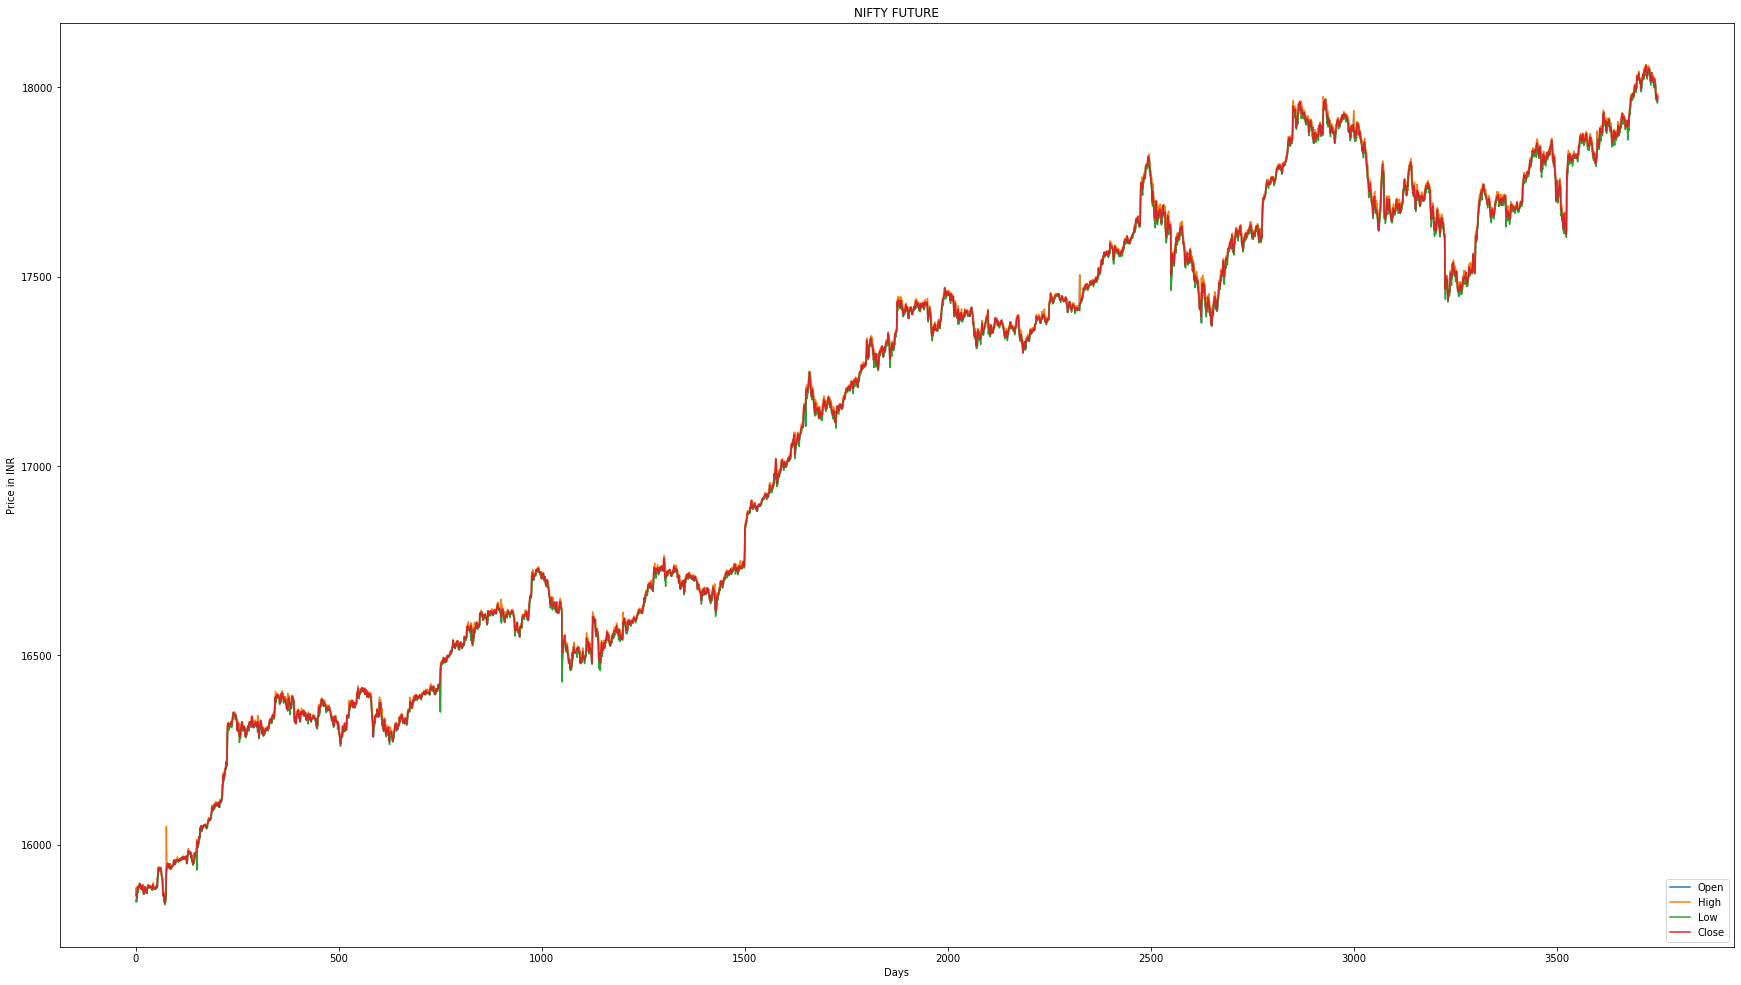

In [29]:
plt.figure(figsize=(30,17))
plt.plot(df["open"])
plt.plot(df["high"])
plt.plot(df["low"])
plt.plot(df["close"])
plt.title('NIFTY FUTURE')
plt.ylabel('Price in INR')
plt.xlabel('Days')
plt.legend(['Open','High','Low','Close'], loc='lower right')
plt.show()

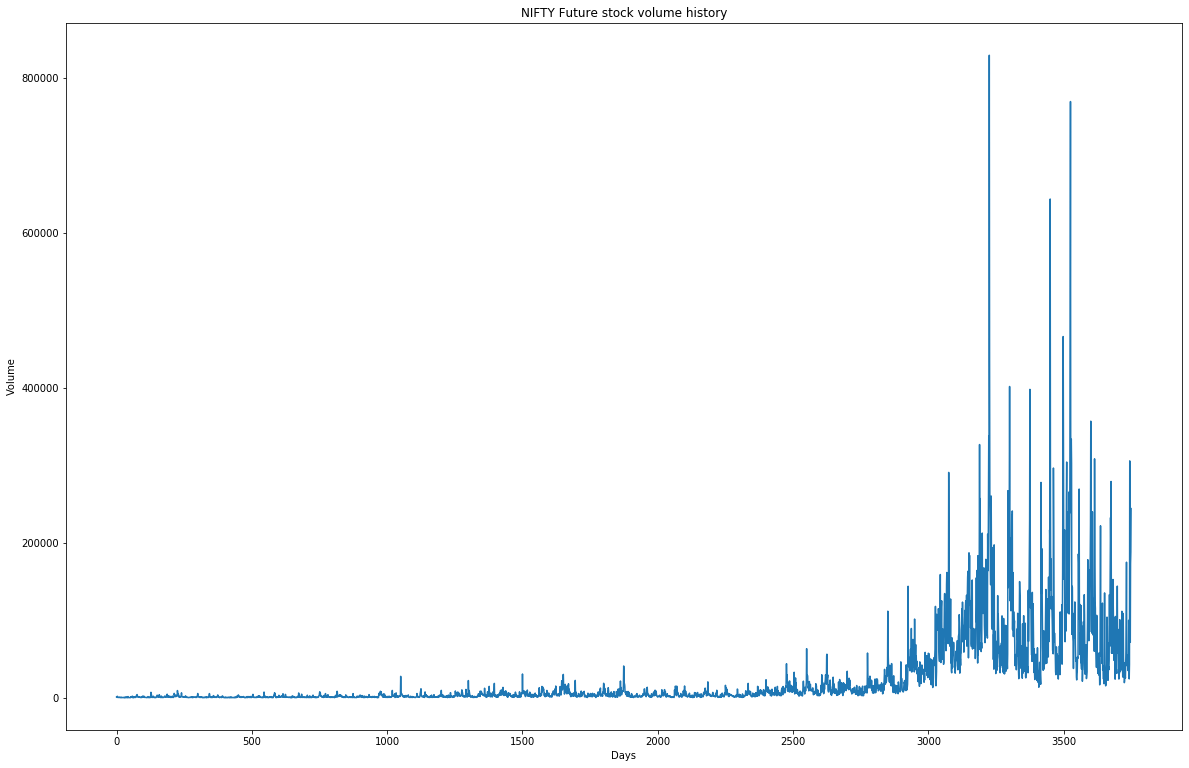

In [30]:
plt.figure(figsize=(20,13))
plt.plot(df["volume"])
plt.title('NIFTY Future stock volume history')
plt.ylabel('Volume')
plt.xlabel('Days')
plt.show()

In [27]:
## A great drop of nifty future occurs in b/w range of 3000-3500, and at the same time the no. of volumne traded is the highest

In [31]:
from sklearn.preprocessing import MinMaxScaler as MMS
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_squared_error as MSE
# train_cols = ["open","high","low","close","volume"]
# train, test = train_test_split(df, train_size=0.8, test_size=0.2, shuffle=False)

In [70]:
import math
data = df.filter(['close'])
dataset = data.values
training_data_len = math.ceil( len(dataset)*0.8)
training_data_len

3000

In [71]:
from sklearn.preprocessing import MinMaxScaler
scaler = MinMaxScaler(feature_range=(0, 1)) 
scaled_data = scaler.fit_transform(dataset)
scaled_data

array([[0.01098404],
       [0.00809113],
       [0.00646386],
       ...,
       [0.96318311],
       [0.9578267 ],
       [0.96264069]])

In [95]:
train_data = scaled_data[0:  , : ]
x_train=[]
y_train = []
for i in range(50,len(train_data)):
    x_train.append(train_data[i-50:i,0])
    y_train.append(train_data[i,0])
    if i== 51:
        print(x_train)
        print(y_train)
        print()

[array([0.01098404, 0.00809113, 0.00646386, 0.0147584 , 0.02013741,
       0.01884916, 0.01821634, 0.02006961, 0.0222845 , 0.02377616,
       0.02257831, 0.02138046, 0.01776432, 0.01907517, 0.01776432,
       0.01631786, 0.02194549, 0.01869096, 0.01369615, 0.01098404,
       0.01419337, 0.01719929, 0.01945939, 0.01945939, 0.01550423,
       0.01550423, 0.01186548, 0.01550423, 0.01848755, 0.01848755,
       0.02183248, 0.02047643, 0.01912037, 0.02034082, 0.01898477,
       0.02054423, 0.01857795, 0.02002441, 0.02002441, 0.01957239,
       0.01640826, 0.01697329, 0.0222167 , 0.01936898, 0.01864575,
       0.01776432, 0.01776432, 0.01681508, 0.01783212, 0.01821634]), array([0.00809113, 0.00646386, 0.0147584 , 0.02013741, 0.01884916,
       0.01821634, 0.02006961, 0.0222845 , 0.02377616, 0.02257831,
       0.02138046, 0.01776432, 0.01907517, 0.01776432, 0.01631786,
       0.02194549, 0.01869096, 0.01369615, 0.01098404, 0.01419337,
       0.01719929, 0.01945939, 0.01945939, 0.01550423, 0.01

In [96]:
x_train, y_train = np.array(x_train), np.array(y_train)
x_train = np.reshape(x_train, (x_train.shape[0],x_train.shape[1],1))

In [113]:
from keras.models import Sequential
from keras.layers import Dense,LSTM
model = Sequential()
model.add(LSTM(units=100, return_sequences=True,input_shape=(x_train.shape[1],1)))
model.add(LSTM(units=100, return_sequences=False))
model.add(Dense(units=100))
model.add(Dense(units=25))
model.add(Dense(units=1))

In [114]:
model.compile(optimizer='adam', loss='mean_squared_error')

In [115]:
model.fit(x_train, y_train, batch_size=3, epochs=7)

Epoch 1/10
3700/3700 [==============================] - 89s 24ms/step - loss: 0.0013
Epoch 2/10
3700/3700 [==============================] - 87s 24ms/step - loss: 3.3251e-04
Epoch 3/10
3700/3700 [==============================] - 86s 23ms/step - loss: 2.5827e-04
Epoch 4/10
3700/3700 [==============================] - 86s 23ms/step - loss: 2.0983e-04
Epoch 5/10
3700/3700 [==============================] - 85s 23ms/step - loss: 1.9446e-04
Epoch 6/10
3700/3700 [==============================] - 93s 25ms/step - loss: 1.2437e-04
Epoch 7/10
 873/3700 [======>.......................] - ETA: 1:10 - loss: 1.7526e-04

KeyboardInterrupt: 

In [116]:
# here we are testing data set
test_data = scaled_data[training_data_len-50: , : ]
#Creating the x_test and y_test data sets
x_test = []
y_test =  dataset[training_data_len : , : ] #Get all of the rows from index 1603 to the rest and all of the columns (in this case it's only column 'Close'), so 2003 - 1603 = 400 rows of data
for i in range(50,len(test_data)):
    x_test.append(test_data[i-50:i,0])

In [117]:
x_test = np.array(x_test)
x_test = np.reshape(x_test, (x_test.shape[0],x_test.shape[1],1))

In [118]:
predictions = model.predict(x_test) 
predictions = scaler.inverse_transform(predictions)#Undo scaling

In [119]:
rmse=np.sqrt(np.mean(((predictions- y_test)**2)))
rmse

17.03418967784362

C:\Users\LEGION\anaconda3\envs\tf\lib\site-packages\ipykernel_launcher.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  This is separate from the ipykernel package so we can avoid doing imports until


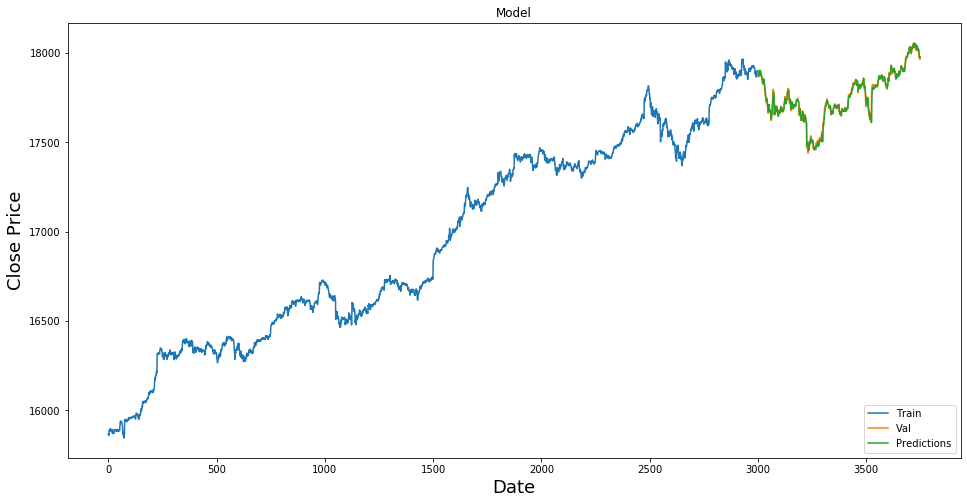

In [120]:
train = data[:training_data_len]
valid = data[training_data_len:]
valid['Predictions'] = predictions
plt.figure(figsize=(16,8))
plt.title('Model')
plt.xlabel('Date', fontsize=18)
plt.ylabel('Close Price', fontsize=18)
plt.plot(train['close'])
plt.plot(valid[['close', 'Predictions']])
plt.legend(['Train', 'Val', 'Predictions'], loc='lower right')
plt.show()

In [121]:
valid

,close,Predictions
3000,17890.10,17898.128906
3001,17884.75,17893.300781
3002,17866.00,17886.880859
3003,17878.55,17871.794922
3004,17871.25,17875.634766
...,...,...
3745,17979.70,17988.642578
3746,17974.20,17983.244141
3747,17976.55,17979.919922
3748,17964.70,17981.371094


95% likelihood that the true value is between 17855.022 and 17921.382
True value: 17898.129


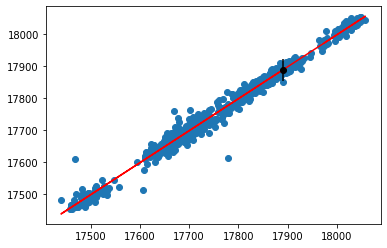

In [129]:
# linear regression prediction with prediction interval
from numpy.random import randn
from numpy.random import seed
from numpy import power
from numpy import sqrt
from numpy import mean
from numpy import std
from numpy import sum as arraysum
from scipy.stats import linregress
from matplotlib import pyplot
# seed random number generator
seed(1)
y=np.array(valid['Predictions'])
x=np.array(valid['close'])
b1, b0, r_value, p_value, std_err = linregress(x, y)
# make predictions
yhat = b0 + b1 * x
# define new input, expected value and prediction
x_in = x[0]
y_out = y[0]
yhat_out = yhat[0]
# estimate stdev of yhat
sum_errs = arraysum((y - yhat)**2)
stdev = sqrt(1/(len(y)-2) * sum_errs)
# calculate prediction interval
lower, upper = yhat_out - interval, yhat_out + interval
print('95%% likelihood that the true value is between %.3f and %.3f' % (lower, upper))
print('True value: %.3f' % y_out)
# plot dataset and prediction with interval
pyplot.scatter(x, y)
pyplot.plot(x, yhat, color='red')
pyplot.errorbar(x_in, yhat_out, yerr=interval, color='black', fmt='o')
pyplot.show()